In [1]:
import pandas as pd                        
from pytrends.request import TrendReq
pytrend = TrendReq()

In [63]:
KEYWORDS=['yaris','alsvin','honda city'] 
KEYWORDS_CODES=[pytrend.suggestions(keyword=i)[0] for i in KEYWORDS] 
df_CODES= pd.DataFrame(KEYWORDS_CODES)
df_CODES


,mid,title,type
0,/m/025rqtz,Toyota Yaris,Subcompact car
1,/g/11f4r89_3w,Changan Alsvin,Topic
2,/m/03mkll,Honda City,Car model


In [64]:
pytrend.suggestions('solar pannel')

[{'mid': '/m/0fnrbc', 'title': 'Solar panel', 'type': 'Topic'},
 {'mid': '/m/06xbd', 'title': 'Solar energy', 'type': 'Topic'},
 {'mid': '/m/03b9jw', 'title': 'Solar thermal collector', 'type': 'Topic'},
 {'mid': '/g/11h0jz0tdc',
  'title': 'Arlo Ultra Solar Panel Charger VMA5600B-10000S',
  'type': 'Topic'},
 {'mid': '/g/11j4s9s0dw', 'title': 'RV Solar Panel', 'type': 'Topic'}]

In [65]:
EXACT_KEYWORDS=df_CODES['mid'].to_list()
DATE_INTERVAL='2021-01-01 2021-03-15'
COUNTRY=["PK"] #Use this link for iso country code
CATEGORY=0 # Use this link to select categories
SEARCH_TYPE='' #default is 'web searches',others include 'images','news','youtube','froogle' (google shopping)

In [66]:
Individual_EXACT_KEYWORD = list(zip(*[iter(EXACT_KEYWORDS)]*1))
Individual_EXACT_KEYWORD = [list(x) for x in Individual_EXACT_KEYWORD]
dicti = {}
i = 1
for Country in COUNTRY:
    for keyword in Individual_EXACT_KEYWORD:
        pytrend.build_payload(kw_list=keyword, 
                              timeframe = DATE_INTERVAL, 
                              geo = Country, 
                              cat=CATEGORY,
                              gprop=SEARCH_TYPE) 
        dicti[i] = pytrend.interest_over_time()
        i+=1
df_trends = pd.concat(dicti, axis=1)

In [67]:
df_trends.columns = df_trends.columns.droplevel(0) #drop outside header
df_trends = df_trends.drop('isPartial', axis = 1) #drop "isPartial"
df_trends.reset_index(level=0,inplace=True) #reset_index
df_trends.columns=['date','yaris','alsvin','honda city'] #change column names


In [68]:
df_trends.head()

,date,yaris,alsvin,honda city
0,2021-01-01,70,13,46
1,2021-01-02,48,10,44
2,2021-01-03,51,11,68
3,2021-01-04,100,4,48
4,2021-01-05,56,4,52


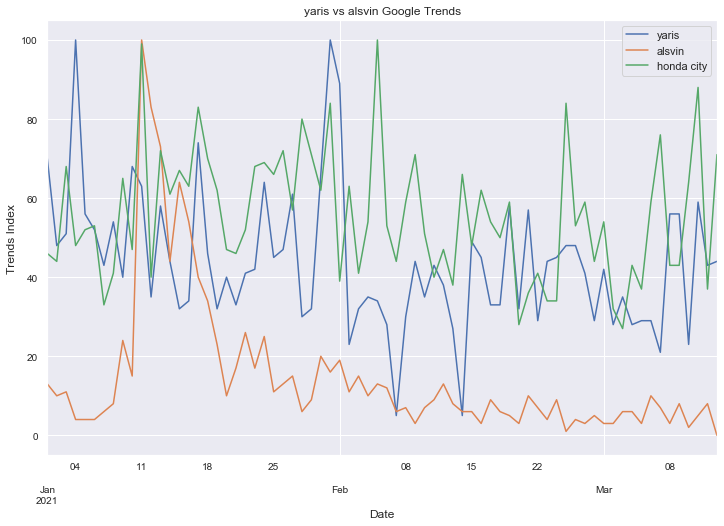

In [69]:
import seaborn as sns
sns.set(color_codes=True)
dx = df_trends.plot(figsize = (12,8),x="date", y=['yaris','alsvin','honda city'], kind="line", title = "yaris vs alsvin Google Trends")
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
dx.tick_params(axis='both', which='both', labelsize=10)